 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
Path.cwd()

WindowsPath('C:/Users/twigi/FT_BootCamp/W4_Assignment/pandas-homework')

In [3]:
#Set input csv files path
csvpath = Path('C:/Users/twigi/FT_BootCamp/W4_Assignment/pandas-homework/')

In [4]:
# Reading whale returns
whale_df = pd.read_csv('./Resources/whale_returns.csv', index_col="Date", parse_dates = True, infer_datetime_format = True )
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df = whale_df.dropna()

In [7]:
#check nulls values are dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_df = pd.read_csv('./Resources/algo_returns.csv', index_col="Date", parse_dates = True, infer_datetime_format = True)
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df = algo_df.dropna()

In [11]:
#check nulls values are dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P TSX 60 Closing Prices
sptsx60_df = pd.read_csv('./Resources/sp_tsx_history.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
sptsx60_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [13]:
# Check Data Types
sptsx60_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Type - Close
#first replace "$" and "," with blank
sptsx60_df["Close"] = sptsx60_df["Close"].str.replace("$","")
sptsx60_df["Close"] = sptsx60_df["Close"].str.replace(",","")

C:\Users\twigi\AppData\Local\Temp\ipykernel_26588\206092060.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sptsx60_df["Close"] = sptsx60_df["Close"].str.replace("$","")


In [15]:
#convert close string to into float
sptsx60_df["Close"] = pd.to_numeric(sptsx60_df["Close"], downcast = "float")

In [16]:
sptsx60_df.dtypes

Close    float32
dtype: object

In [17]:
# Calculate Daily Returns
sptsx60_daily_returns =sptsx60_df["Close"].pct_change()
sptsx60_daily_returns.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1817 non-null   float32
dtypes: float32(1)
memory usage: 21.3 KB


In [18]:
#check nulls in daily return df
sptsx60_daily_returns.isnull().sum()

1

In [19]:
# Drop nulls
sptsx60_daily_returns = sptsx60_daily_returns.dropna()

In [20]:
#check nulls is dropped
sptsx60_daily_returns.isnull().sum()

0

In [21]:
# Rename `Close` Column to be specific to this portfolio.
sptsx60_daily_returns = sptsx60_daily_returns.rename("sptsx60")
sptsx60_daily_returns.head()

Date
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
2012-10-09   -0.011709
Name: sptsx60, dtype: float32

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_daily_returns = pd.concat([whale_df, algo_df, sptsx60_daily_returns], axis="columns", join="inner")
all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sptsx60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [23]:
all_daily_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sptsx60
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.000141,-0.000241,-0.000099,0.000377,0.000713,0.000208,0.000087
std,0.007828,0.006982,0.010883,0.012826,0.007589,0.008326,0.007034
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.031241
25%,-0.003662,-0.004038,-0.004784,-0.005725,-0.003139,-0.003892,-0.003668
50%,0.000529,0.000000,0.000295,0.000635,0.000143,0.000629,0.000587
75%,0.004330,0.003621,0.005324,0.007516,0.004038,0.005256,0.004237
max,0.029881,0.027032,0.080705,0.061341,0.050735,0.030509,0.029389


In [78]:
#rename columns for ease of referencing and neater visual plot
all_daily_returns = all_daily_returns.rename( columns = {"SOROS FUND MANAGEMENT LLC": "Soros",
                                                         "PAULSON & CO.INC. ": "Paulson",
                                                         "TIGER GLOBAL MANAGEMENT LLC": "Tiger",
                                                         "BERKSHIRE HATHAWAY INC":"Berkshire",
                                                         "Algo 1": "Algo_1",
                                                         "Algo 2": "Algo_2",
                                                         "sptsx60": "sptsx60"})

In [79]:
all_daily_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo_1,Algo_2,sptsx60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

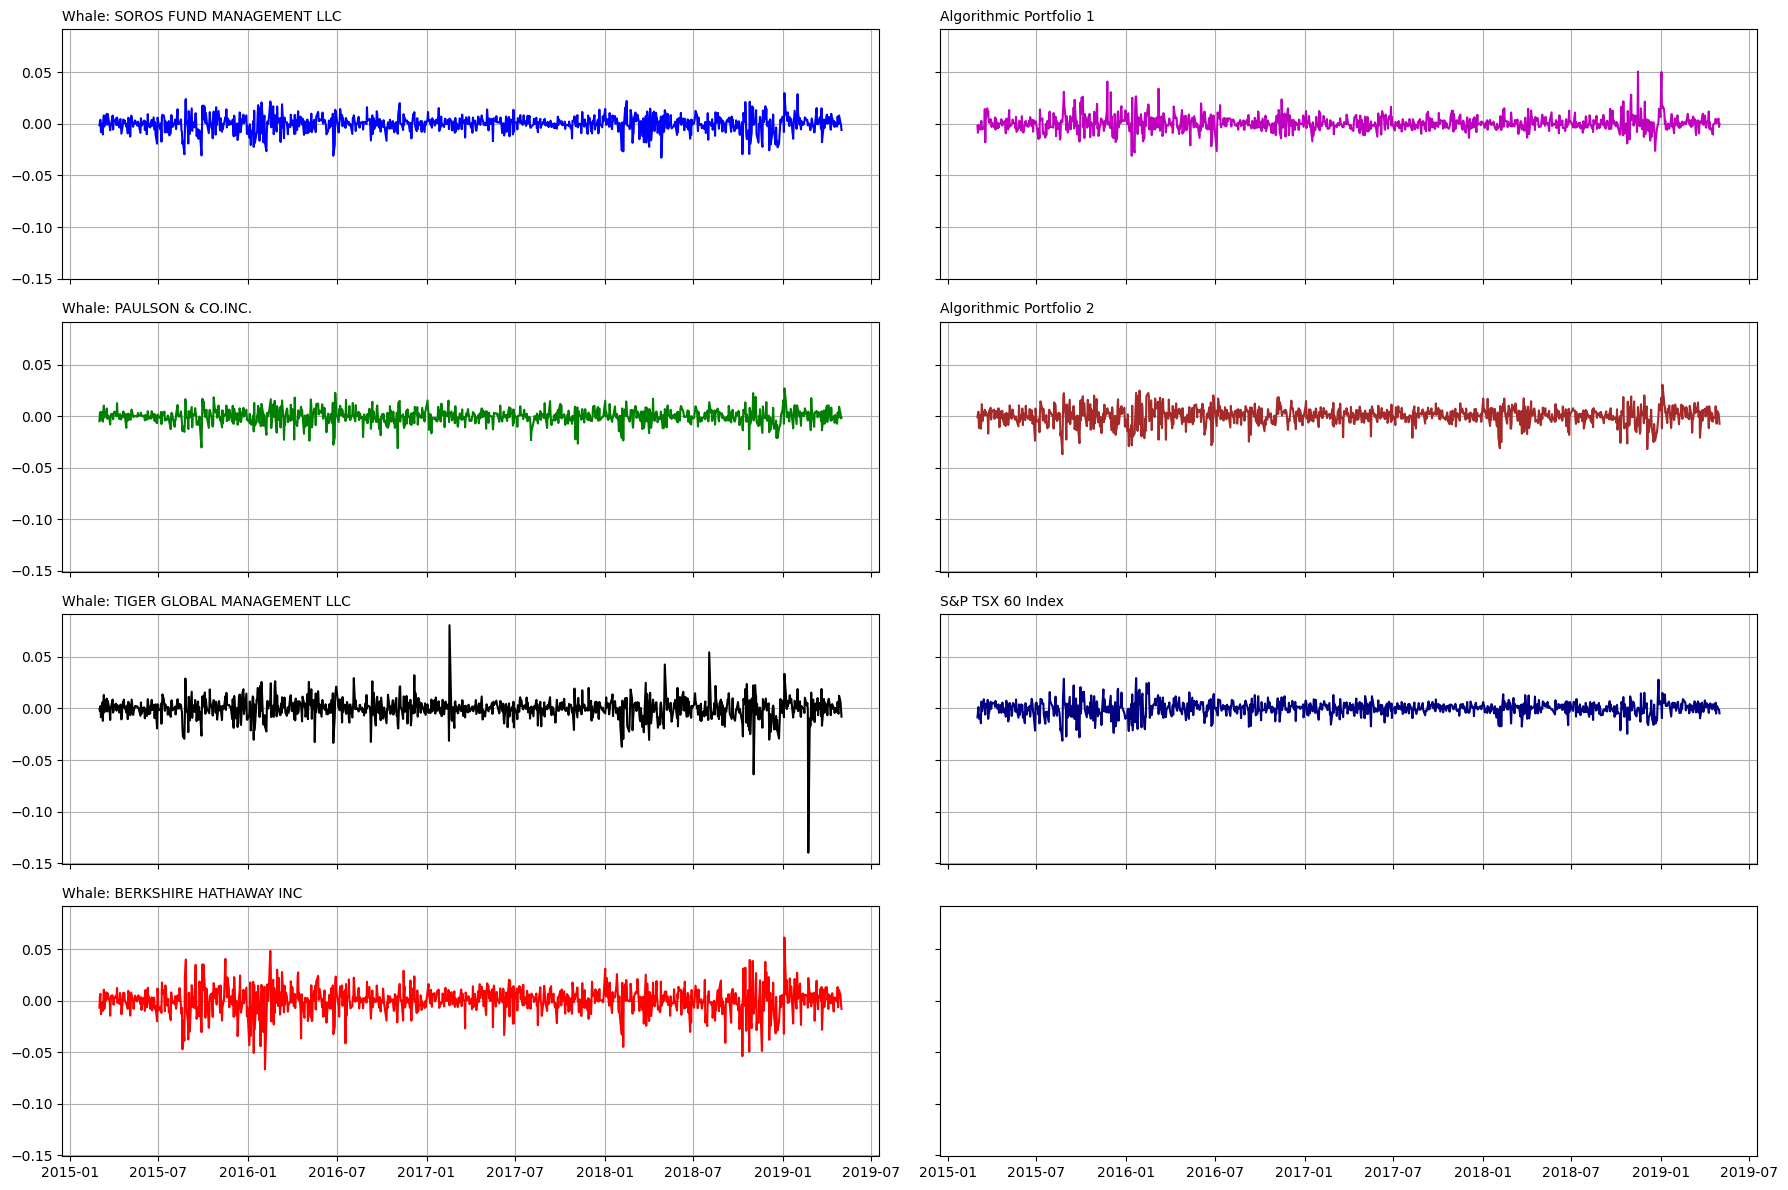

In [80]:
# Plot daily returns of all portfolios
fig, axs = plt.subplots(4,2, sharex = True, sharey = True, figsize=(18,12))

#fig.suptitle("Daily Returns")

#plot 1
axs[0,0].plot(all_daily_returns["Soros"], color="b")
axs[0,0].set_title("Whale: SOROS FUND MANAGEMENT LLC", loc="left", fontsize = 10)
axs[0,0].grid(True)
#axs[0,0].set_xlabel('date')
#axs[0,0].set_ylabel('%')

#plot 2
axs[1,0].plot(all_daily_returns["Paulson"], color="g")
axs[1,0].set_title("Whale: PAULSON & CO.INC.", loc="left", fontsize = 10)
axs[1,0].grid(True)

#plot 3
axs[2,0].plot(all_daily_returns["Tiger"], color="k")
axs[2,0].set_title("Whale: TIGER GLOBAL MANAGEMENT LLC", loc="left", fontsize = 10)
axs[2,0].grid(True)

#plot 4
axs[3,0].plot(all_daily_returns["Berkshire"], color="r")
axs[3,0].set_title("Whale: BERKSHIRE HATHAWAY INC", loc="left", fontsize = 10)
axs[3,0].grid(True)

#plot 5
axs[0,1].plot(all_daily_returns["Algo_1"], color="m")
axs[0,1].set_title("Algorithmic Portfolio 1", loc="left", fontsize = 10)
axs[0,1].grid(True)

#plot 6
axs[1,1].plot(all_daily_returns["Algo_2"], color="brown")
axs[1,1].set_title("Algorithmic Portfolio 2", loc="left", fontsize = 10)
axs[1,1].grid(True)

#plot 7
axs[2,1].plot(all_daily_returns["sptsx60"], color="navy")
axs[2,1].set_title("S&P TSX 60 Index", loc="left", fontsize = 10)
axs[2,1].grid(True)


fig.tight_layout()
plt.show()

#### Calculate and Plot cumulative returns.

In [81]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+all_daily_returns).cumprod()-1
cumulative_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo_1,Algo_2,sptsx60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:title={'center':'Cumulative return'}, xlabel='Date'>

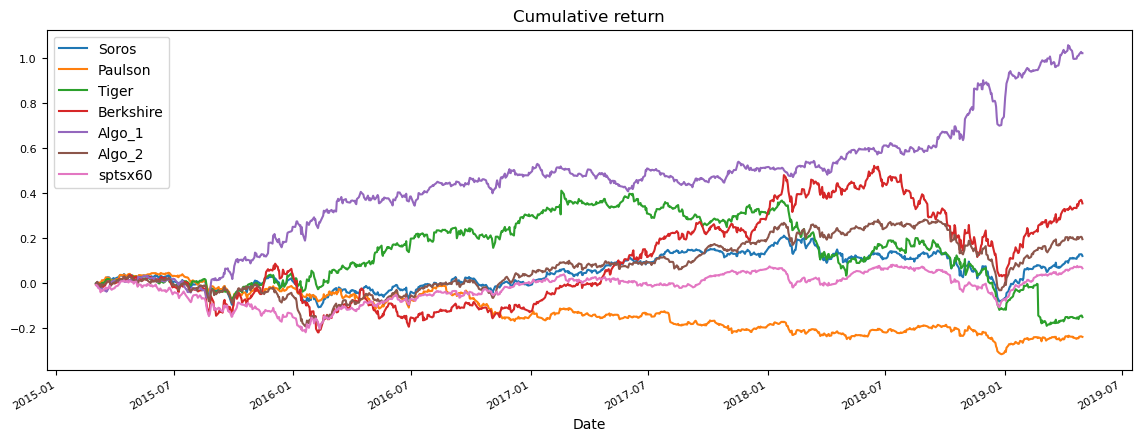

In [82]:
#Plot cumulative returns
cumulative_returns.plot( fontsize = 8, figsize=(14,5), title = "Cumulative return")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box plot: Daily returns of each portfolio'}>

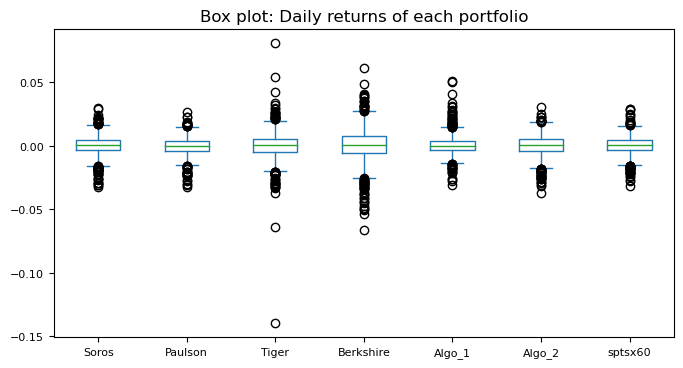

In [88]:
# Box plot to visually show risk
all_daily_returns.plot.box(figsize=(8,4), fontsize = 8, title = "Box plot: Daily returns of each portfolio")

### Calculate Standard Deviations

In [89]:
# Calculate the daily standard deviations of all portfolios and S&P TSX 60
all_daily_returns.std()

Soros        0.007828
Paulson      0.006982
Tiger        0.010883
Berkshire    0.012826
Algo_1       0.007589
Algo_2       0.008326
sptsx60      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [28]:
# Determine which portfolios are riskier than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [90]:
# Calculate the annualized standard deviation (252 trading days)
ann_sd = all_daily_returns.std()*np.sqrt(252)
ann_sd

Soros        0.124259
Paulson      0.110841
Tiger        0.172759
Berkshire    0.203599
Algo_1       0.120470
Algo_2       0.132177
sptsx60      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [31]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [32]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [33]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios


In [35]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Reading data from 1st stock


In [37]:
# Reading data from 2nd stock


In [38]:
# Reading data from 3rd stock


In [39]:
# Combine all stocks in a single DataFrame


In [40]:
# Reset Date index


In [41]:
# Reorganize portfolio data by having a column per symbol


In [42]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [47]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [48]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [49]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualized Sharpe Ratios


In [51]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!